## Imports and Setup - Data prep

In [114]:
import tensorflow as tf
from tensorflow import keras
import IPython, IPython.display, os, datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rcParams['figure.figsize'] = (14, 4)
mpl.rcParams['axes.grid'] = True

In [115]:
# Lets prepare the data and save it away
# You may consider doing preparation during the training once you get the statistics about the data
# But we will just do it here.

# Note you can read the zip file directly in pandas

file = '../data/jena_climate_2009_2016.csv.zip'
df = pd.read_csv(file)
df['Date Time'] = pd.to_datetime( df['Date Time'], format='%d.%m.%Y %H:%M:%S' )
print("Data Collected every 10 minutes")
display(df)

Data Collected every 10 minutes


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


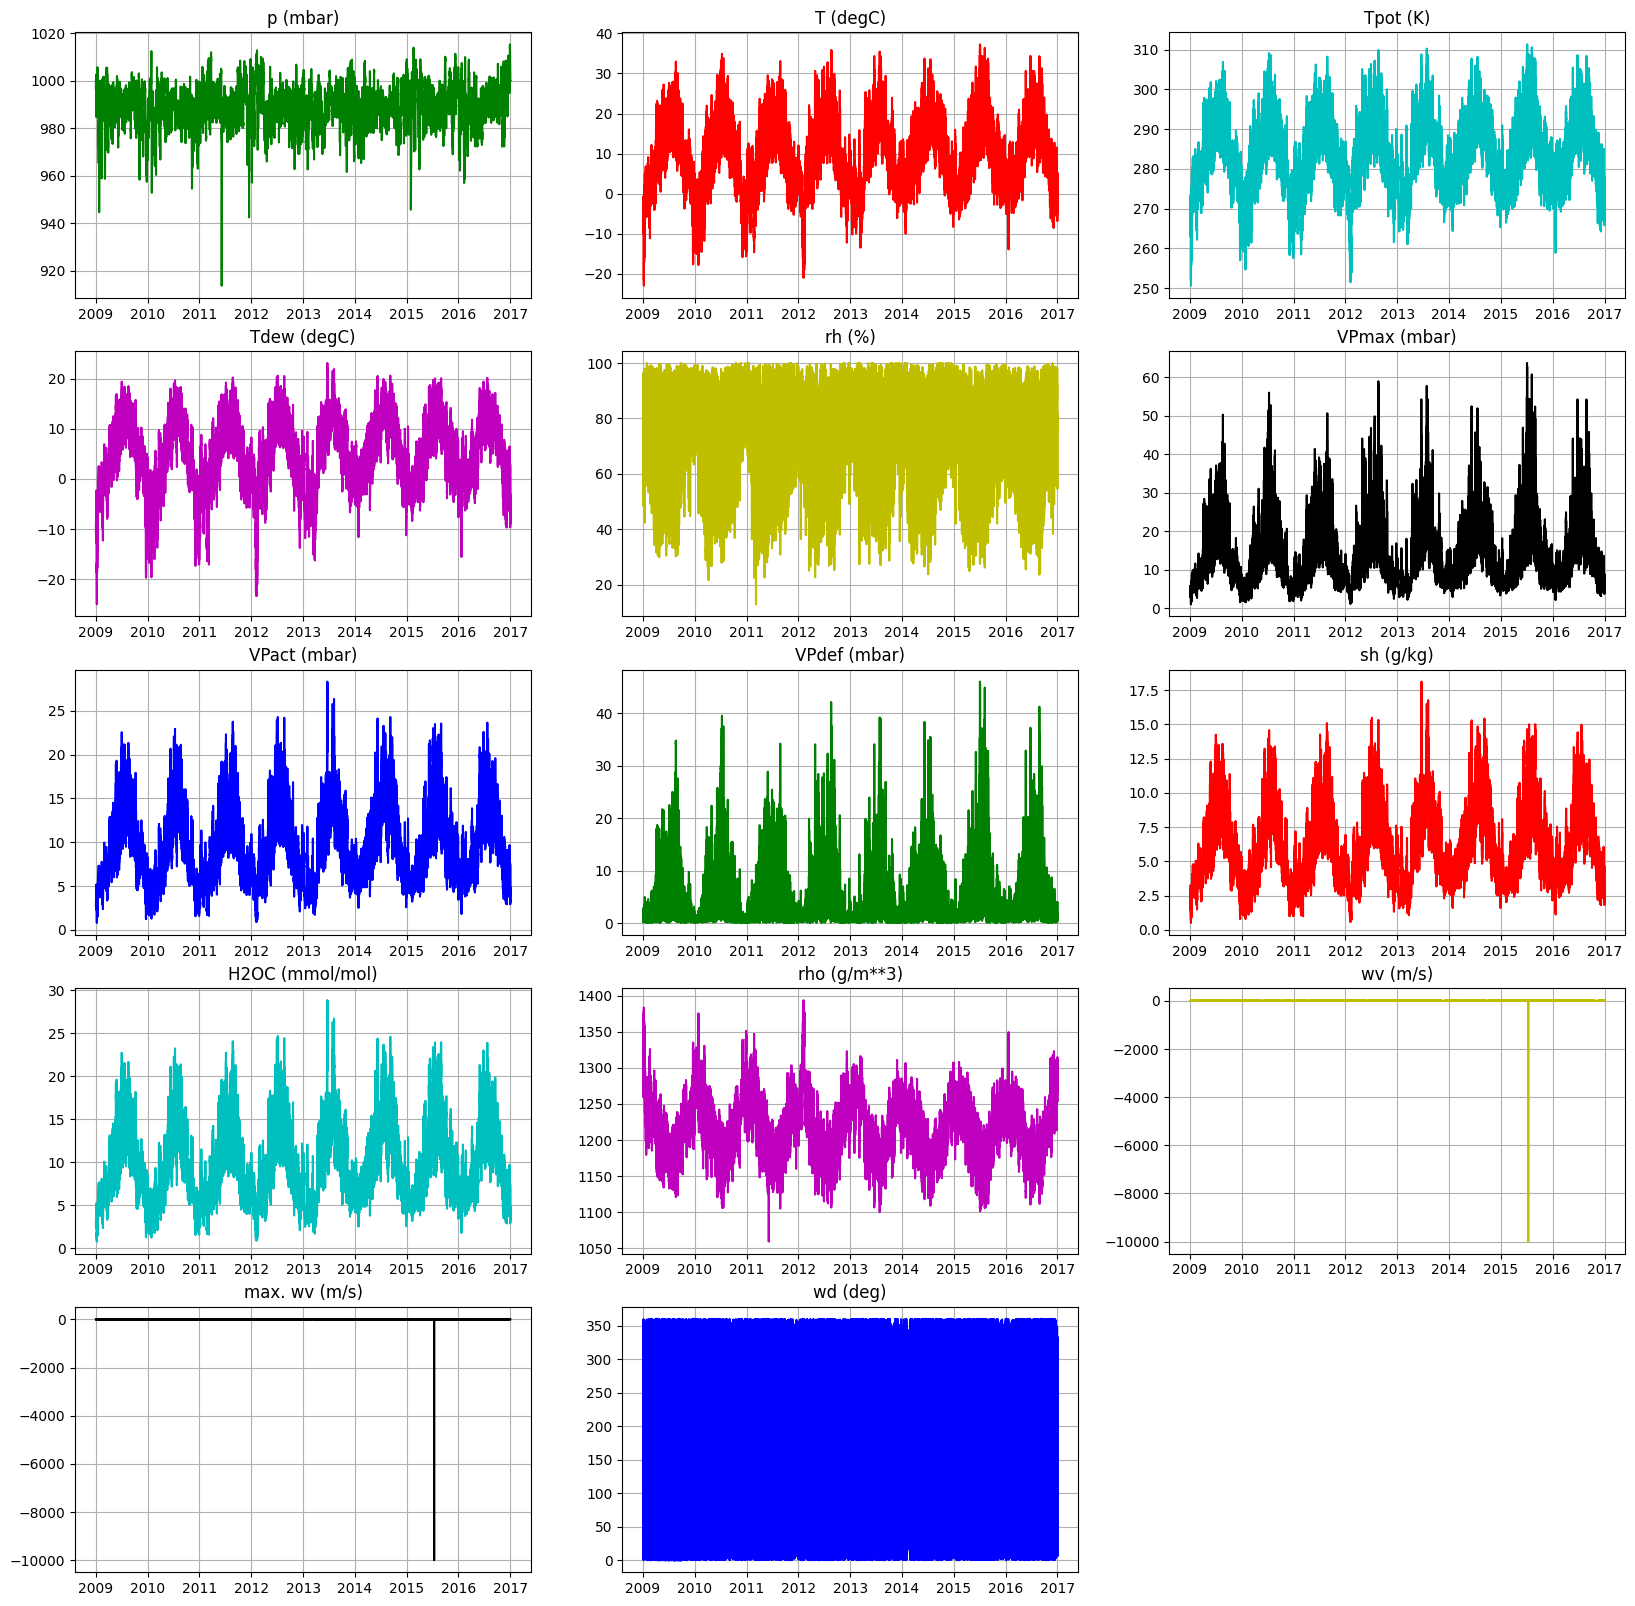

In [116]:
colors = "b g r c m y k ".split()
plt.figure(figsize=(20, 20) )
for i in range(1,len(df.columns)):
    plt.subplot(5, 3, i)
    col = df.columns[i]
    plt.plot(df['Date Time'], df[col], color=colors[i%len(colors)])
    plt.title(col)

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [118]:
# Fix Wind velocity that shows up as-9999 - lets set its minimum to 0
# Check to make sure it is fixed

df.loc[df['wv (m/s)'] < 0, 'wv (m/s)'] = 0
df.loc[df['max. wv (m/s)'] < 0, 'max. wv (m/s)'] = 0
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


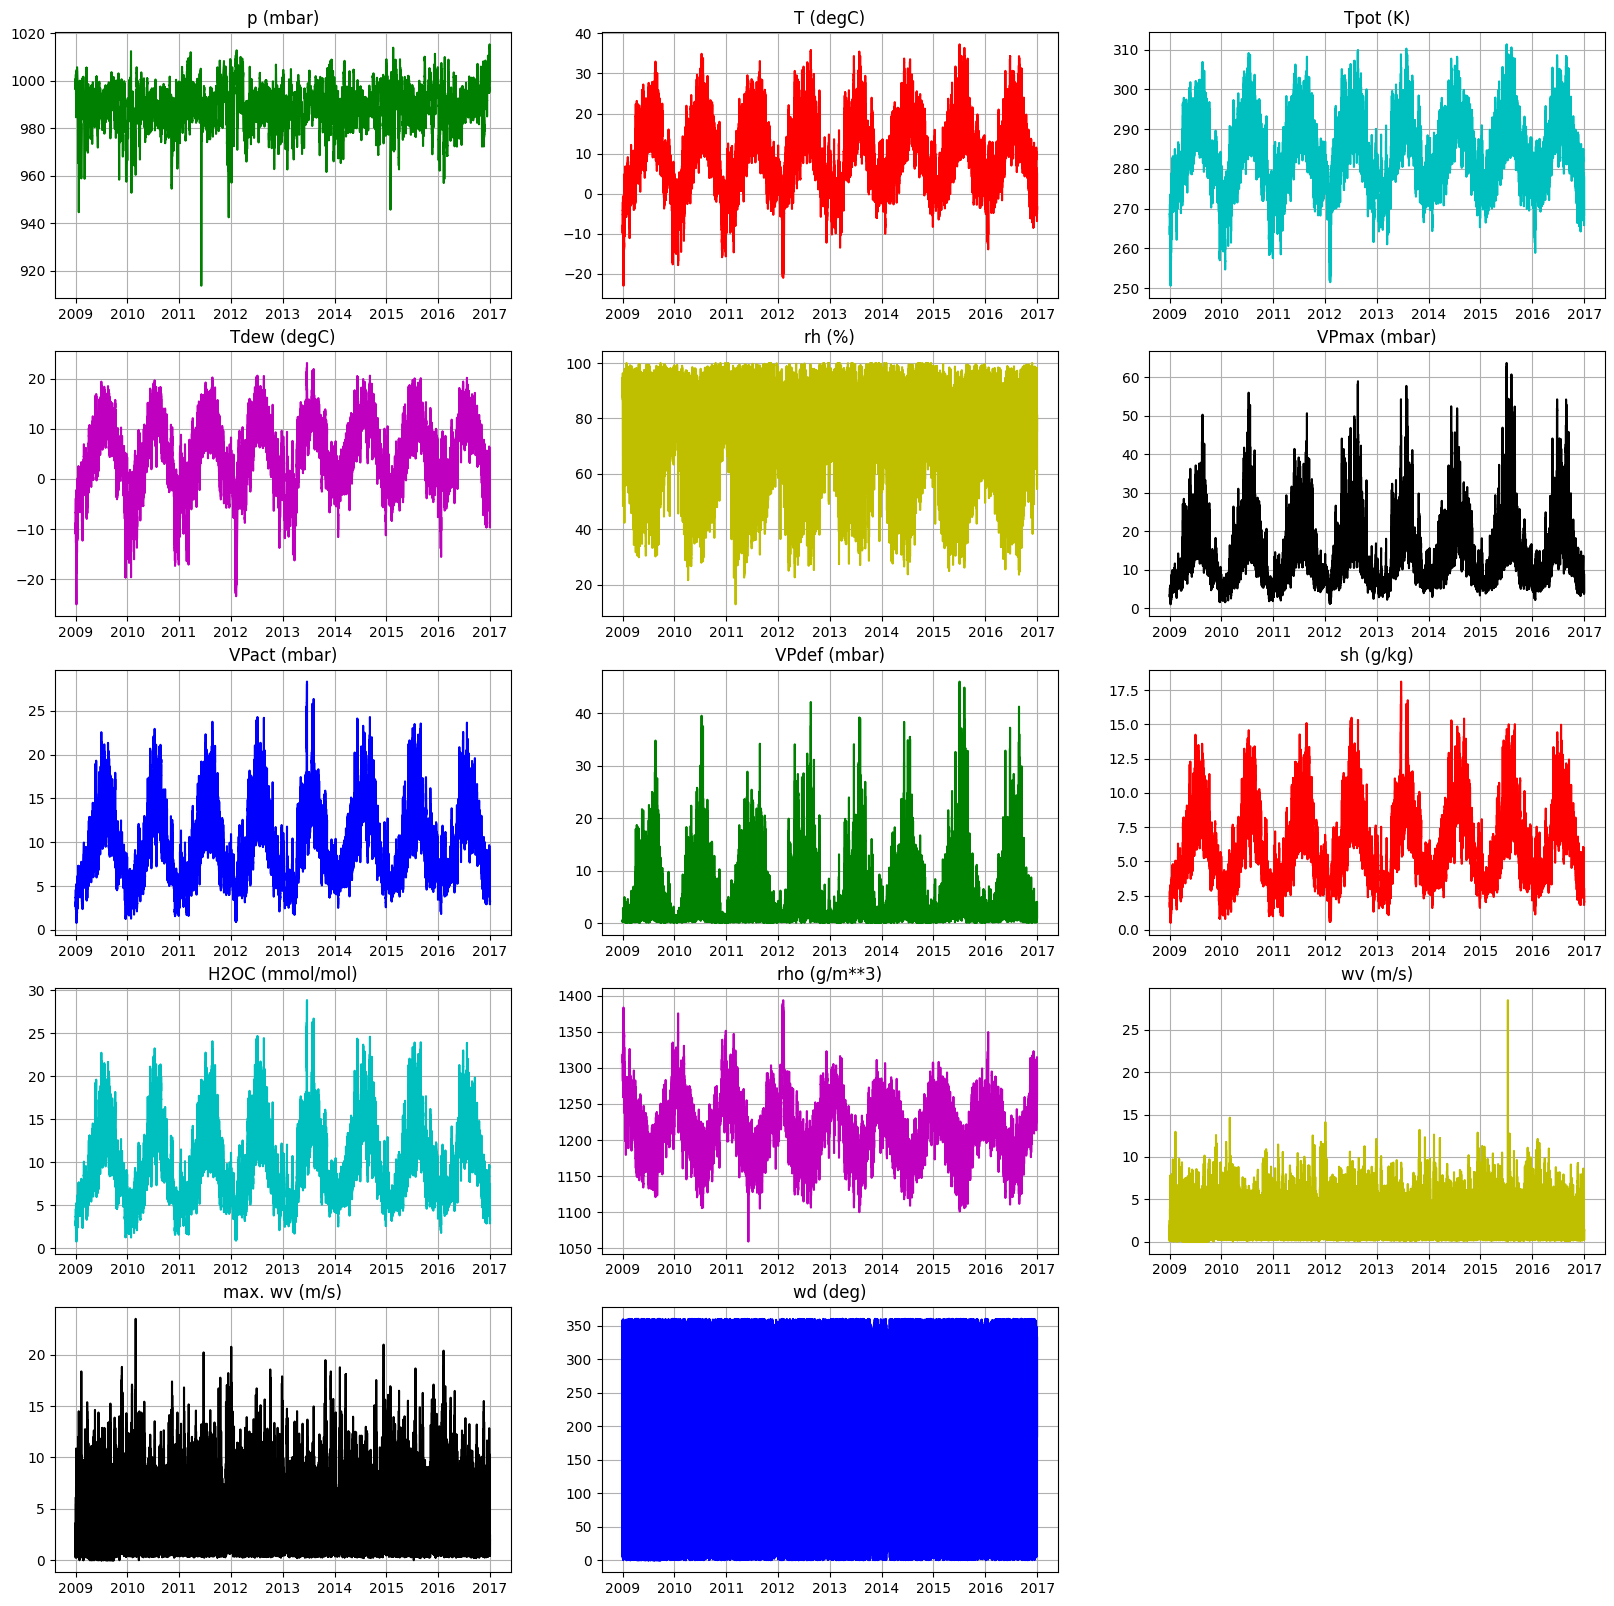

In [119]:
colors = "b g r c m y k ".split()
plt.figure(figsize=(20, 20) )
for i in range(1,len(df.columns)):
    plt.subplot(5, 3, i)
    col = df.columns[i]
    plt.plot(df['Date Time'], df[col], color=colors[i%len(colors)])
    plt.title(col)

In [120]:
df = df[5::6]      # Lets takes hourly data - th data is i minutes, every 6th entry corresponds to hour
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,2016-12-31 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


### Add features


In [121]:
# Time column in and of itself is not so useful 
# the time that that indicates week day or weekend tells you more about the traffic
# A time that tells day or night can give more info on the temperature

timestamp_s = df['Date Time'].map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

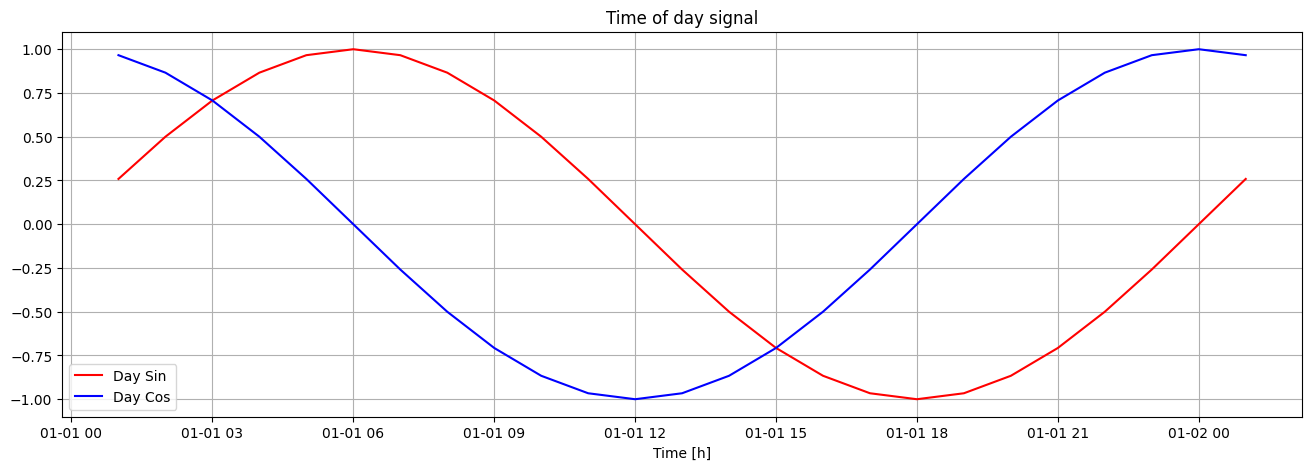

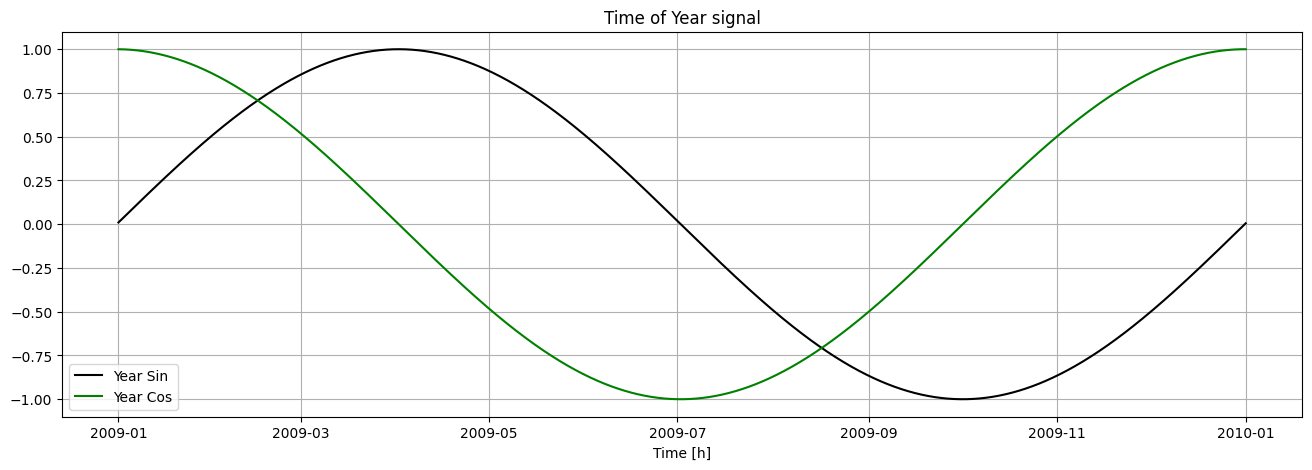

In [122]:
plt.figure(figsize=(16,5))
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.plot(df['Date Time'][:25], df['Day sin'] [:25] , c="r", label="Day Sin")
plt.plot(df['Date Time'][:25], df['Day cos'] [:25] , c="b", label="Day Cos")
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.plot(df['Date Time'][:365*24], df['Year sin'][:365*24], c="k", label="Year Sin")
plt.plot(df['Date Time'][:365*24], df['Year cos'][:365*24], c="g", label="Year Cos")
plt.xlabel('Time [h]')
plt.title('Time of Year signal')
plt.legend();

### Save data to file

Save the file to disk. You may consider do other transformation such as one-hot encoding etc.

In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

scaler = StandardScaler()
split  = int(len(df) * .8)
df_trn  = df[df.columns[1:]][:split]
df_tst  = df[df.columns[1:]][split:]
scaler.fit(df_trn)

df_scaled_trn = pd.DataFrame(scaler.transform(df_trn), columns=df_trn.columns)
df_scaled_tst = pd.DataFrame(scaler.transform(df_tst), columns=df_trn.columns)

# Save the scaler to a pickle file
pickle.dump(scaler, open(f'{file}.scaler.pkl', 'wb'))

##=> You can load the scaler in future 
# scaler = pickle.load(open(f'{file}.scaler.pkl', 'rb'))
# scaler.transform(df_train)

# You can inverse transform predicted value to get original value 
# pd.DataFrame(scaler.inverse_transform(scaler.transform(df_train)))

# index = False tells not to write the index to CSV file
df.to_csv(file+".csv", index=False)
df_scaled_trn.to_csv(file+".trn.csv", index=False)
df_scaled_tst.to_csv(file+".tst.csv", index=False)

df_scaled_trn[0:10]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Day sin,Day cos,Year sin,Year cos
0,0.918199,-2.018473,-2.075600,-1.951683,1.102658,-1.315794,-1.483534,-0.788226,-1.485852,-1.488569,2.246640,-1.257984,-1.252731,0.214456,0.366058,1.366366,-0.049590,1.401955
1,0.932570,-2.116803,-2.174215,-2.096616,1.029922,-1.343873,-1.541361,-0.783947,-1.542786,-1.545690,2.356037,-1.232044,-1.252731,0.186889,0.707152,1.225091,-0.048581,1.401945
2,0.958917,-2.108510,-2.168345,-2.080512,1.048106,-1.342536,-1.534133,-0.786086,-1.535194,-1.538550,2.354292,-1.277439,-1.252731,-0.078439,1.000057,1.000355,-0.047571,1.401933
3,0.976881,-2.136943,-2.197695,-2.133215,0.993555,-1.350558,-1.553409,-0.779667,-1.554173,-1.559970,2.389927,-1.329318,-1.359684,0.757747,1.224811,0.707473,-0.046562,1.401921
4,1.033168,-2.205656,-2.270482,-2.225446,0.969309,-1.367941,-1.587141,-0.779667,-1.588333,-1.593290,2.479139,-1.134770,-1.145779,-0.195597,1.366097,0.366405,-0.045552,1.401908
5,1.063107,-2.210395,-2.277526,-2.221054,0.999616,-1.369278,-1.587141,-0.783947,-1.588333,-1.590910,2.492097,-1.361743,-1.308347,-0.321944,1.414287,0.000394,-0.044542,1.401895
6,1.137358,-2.151160,-2.223522,-2.144927,1.011738,-1.354570,-1.558228,-0.781807,-1.561764,-1.564730,2.448986,-0.045299,-0.290162,2.007432,1.366097,-0.365618,-0.043533,1.401881
7,1.237955,-2.024396,-2.106123,-1.991210,1.005677,-1.318469,-1.500400,-0.777527,-1.501034,-1.505230,2.341085,-0.927252,-0.987490,0.457960,1.224811,-0.706686,-0.042523,1.401866
8,1.300230,-1.972269,-2.059164,-1.960467,0.908696,-1.302424,-1.485944,-0.764688,-1.489647,-1.493329,2.303456,-1.173679,-1.252731,0.323573,1.000057,-0.999567,-0.041514,1.401850
9,1.369690,-1.898817,-1.991072,-1.862380,0.932942,-1.279693,-1.444983,-0.764688,-1.451691,-1.455249,2.244148,-0.453851,-0.238825,1.361914,0.707152,-1.224304,-0.040504,1.401833
